## Problem Set 2
### MACS 30200
### Leoson Hoay

**Importing necessary packages**:

In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
from scipy.stats import pearsonr
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.neighbors import KernelDensity

**Problem 1A:**

In [4]:
bq_data = np.loadtxt('BQmat_orig.txt', delimiter=',')
bq_data.view()

array([[0.00000000e+00, 2.83821991e-04, 6.02760667e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.78678994e-04, 3.49568070e-04, 0.00000000e+00, 8.23400392e-06,
        8.34493170e-06, 2.51913214e-05, 0.00000000e+00],
       [4.47625680e-04, 9.70091124e-05, 0.00000000e+00, 0.00000000e+00,
        1.20441636e-04, 4.74592862e-04, 1.11411735e-02],
       [8.77122467e-05, 1.97168377e-05, 1.67393465e-04, 3.37768206e-04,
        0.00000000e+00, 0.00000000e+00, 7.68656636e-05],
       [1.30667055e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.30857801e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.17250614e-04,
        0.00000000e+00, 7.51155655e-05, 2.88012798e-03],
       [5.91784831e-04, 0.00000000e+00, 1.20779289e-04, 1.07985346e-03,
        2.87617222e-04, 7.84117928e-05, 0.00000000e+00],
       [7.39362157e-05, 9.51050861e-06, 0.00000000e+00, 9.39006019e-06,
        2.84515843e-05, 9

In [5]:
abils_midpt = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])
ages_vec = np.arange(18, 96)

<IPython.core.display.Javascript object>


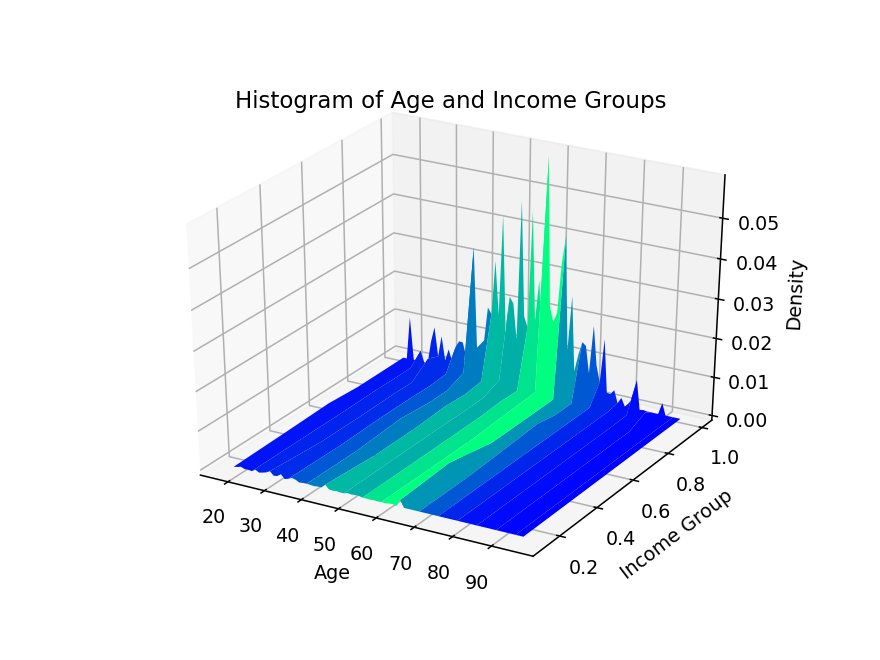

Text(0.5,0,'Density')

In [19]:
%matplotlib notebook
y_mat, x_mat = np.meshgrid(abils_midpt, ages_vec)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x_mat, y_mat, bq_data, rstride=5, cmap=cm.winter)
plt.title("Histogram of Age and Income Groups")
plt.xlabel("Age")
plt.ylabel("Income Group")
ax.set_zlabel("Density")

**Problem 1B:**

In [14]:
prop_mat_inc = np.sum(bq_data, axis=0)
prop_mat_age = np.sum(bq_data, axis=1)
lrg_samp = 70000
age_probs = np.random.multinomial(lrg_samp, prop_mat_age)
income_probs = np.random.multinomial(lrg_samp, prop_mat_inc)
age_freq = np.array([])
inc_freq = np.array([])

# creating a distribution of age values
for age, num_s in zip(ages_vec, age_probs):
    vec_age_s = np.ones(num_s)
    vec_age_s *= age
    age_freq = np.append(age_freq, vec_age_s)

# creating a distribution of ability type values
for abil, num_j in zip(abils_midpt, income_probs):
    vec_abil_j = np.ones(num_j)
    vec_abil_j *= abil
    inc_freq = np.append(inc_freq, vec_abil_j)
    
# cross validation of bandwidths
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv= KFold(10))
grid.fit(bq_data[:, ])

data = np.vstack((age_freq, inc_freq))
density = gaussian_kde(data, bw_method=grid.best_params_["bandwidth"])

coords = np.vstack([item.ravel() for item in [x_mat, y_mat]])
BQkde = density(coords).reshape(x_mat.shape)
BQkde_scaled = BQkde / np.sum(BQkde)

<IPython.core.display.Javascript object>


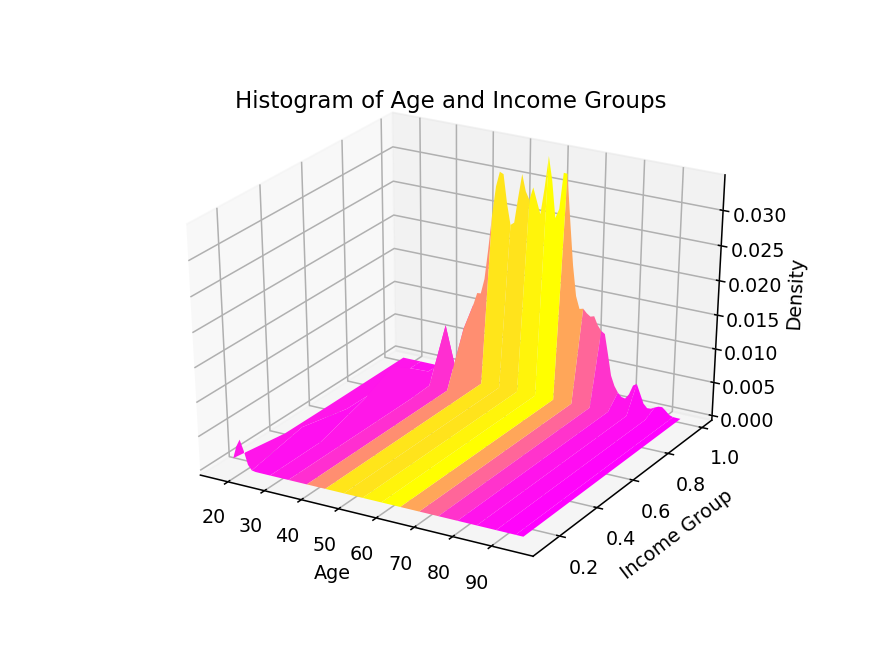

In [20]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x_mat, y_mat, BQkde_scaled, rstride=5, cmap = cm.spring)
plt.title("Histogram of Age and Income Groups")
plt.xlabel("Age")
plt.ylabel("Income Group")
ax.set_zlabel("Density")
plt.show()

In [22]:
grid.best_params_["bandwidth"]

0.1

A gaussian density kernel estimator was used, and $\lambda$ was estimated using a 10-fold K-Folds cross validation method. ($\lambda$ = 0.1)

In [23]:
BQkde_scaled[61, 5]

2.1613885585391666e-07

The estimated density is 2.1613885585391666e-07.

**Problem 2:**